# Sales Analysis with Pandas

**Sales analysis** is a critical process that involves examining and evaluating sales data to gain valuable insights into a company's performance. This process enables businesses to make informed decisions by analyzing various aspects of sales, including trends, patterns, customer behavior, and performance metrics.

Effective sales analysis helps companies understand their sales performance, identify areas of strength and weakness, pinpoint opportunities for growth, and develop strategies to improve sales effectiveness. The key components of sales analysis include:

1. `Sales Volume Analysis`: Examining the quantity of products or services sold over a specific period.
2. `Revenue Analysis`: Assessing the revenue generated from sales, including total revenue, revenue by product or service, and revenue by customer segment.
3. `Sales Trend Analysis`: Identifying patterns and trends in sales data over time, such as seasonal fluctuations, cyclical trends, or changes in demand.
4. `Customer Analysis`: Understanding the demographics, preferences, buying behavior, and purchasing patterns of customers to target marketing efforts more effectively and improve customer satisfaction.
5. `Product Performance Analysis`: Evaluating the performance of individual products or product categories in terms of sales volume, revenue, profitability, and market share.
6. `Sales Channel Analysis`: Analyzing the effectiveness of different sales channels (e.g., direct sales, online sales, distribution channels) and optimizing their performance.
7. `Sales Forecasting`: Using historical sales data and predictive analytics to forecast future sales volumes and revenue.
8. `Competitive Analysis`: Comparing the company's sales performance with that of competitors to identify strengths, weaknesses, and opportunities in the market.

Store sales and profit analysis play a crucial role in helping businesses identify areas for improvement and make data-driven decisions to optimize their operations, pricing, marketing, and inventory management strategies to drive revenue and growth.

**Pandas: A Powerful Tool for Sales Analysis**

Pandas is a powerful Python library for data manipulation and analysis, and it plays a crucial role in sales analysis. With Pandas, you can:

1. Clean and preprocess sales data to ensure accuracy and consistency.
2. Perform data manipulation tasks, such as filtering, sorting, grouping, and aggregating data.
3. Analyze time series data to understand sales trends and patterns.
4. Create insightful visualizations of sales data using data visualization libraries like Matplotlib and Seaborn.
5. Merge and join multiple datasets based on common keys or indices to perform comprehensive analysis and gain deeper insights into sales performance.

**Case Study: SuperStore Sales Analysis**

**Objective**

* Analyze the overall sales trend.
* Examine sales by category and sub-category.
* Perform profit analysis and analyze profit by customer segments.
* Identify the top 10 products by sales.
* Determine the most selling products.
* Identify the most preferred ship mode.
* Determine the most profitable category and sub-category.

[DATASET SOURCE](https://community.tableau.com/s/question/0D54T00000CWeX8SAL/sample-superstore-sales-excelxls)

## Import Library

In [403]:
# Import necessary libraries for data manipulation and visualization
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For creating static visualizations
import seaborn as sns  # For creating informative and attractive statistical graphics
import warnings  # For handling warnings and errors
import plotly.express as px  # For creating interactive visualizations
import plotly.graph_objects as go  # For creating custom interactive visualizations
import plotly.io as pio  # For setting plotly configuration
import plotly.colors as colors  # For accessing plotly color palettes

# Set the default plotly template to 'plotly_white' for a clean and minimalistic look
pio.templates.default = "plotly_white"

# Suppress all warnings to prevent cluttering the console with unnecessary messages
warnings.filterwarnings('ignore')

In [404]:
# Importing the pandas library to read and manipulate our dataset
import pandas as pd

# Reading Our Dataset from a CSV file
# We will use the pandas library to read our dataset
dataset = pd.read_csv('Sample - Superstore.csv')

# Displaying Information about Our Dataset
# This will provide a concise summary of our dataset, including the index dtype and column dtypes, 
# non-nullable counts, and memory usage.
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [405]:
# Retrieve and display the column names of the DataFrame
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [406]:
# Assign the dataset to a pandas DataFrame for easier manipulation
df = dataset  # Create a copy of the original dataset

In [407]:
# Display the first few rows of the DataFrame to verify its contents
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### The dataset consists of 21 columns and 9994 rows.
# Number of rows and columns in the dataset
# Rows = 9994, Columns = 21

In [408]:
# Check for missing values in the dataset
# The isnull() function returns a boolean mask indicating missing values
# The sum() function counts the number of True values (i.e., missing values) in each column
print(df.isnull().sum())# Is their any missing value our dataset

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


# There are no missing values in the data, so we don't need to handle it.
# This is confirmed by the data quality check performed earlier.

In [409]:
# Grouping data by State
# Display the count of each unique State in the dataframe
df.State.value_counts()# groupig with State

State
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
South Carolina            42
Louisiana                 42
Nevada  

In [410]:
# Grouping data by Country and counting occurrences
# This will display the number of rows for each country in descending order
df.Country.value_counts()# groupig with Country

Country
United States    9994
Name: count, dtype: int64

In [411]:
# Display a summary of the DataFrame's statistics, rounded to 2 decimal places
df.describe().round(2).T[:]

,count,mean,std,min,25%,50%,75%,max
Row ID,9994.0,4997.50,2885.16,1.00,2499.25,4997.50,7495.75,9994.00
Postal Code,9994.0,55190.38,32063.69,1040.00,23223.00,56430.50,90008.00,99301.00
Sales,9994.0,229.86,623.25,0.44,17.28,54.49,209.94,22638.48
Quantity,9994.0,3.79,2.23,1.00,2.00,3.00,5.00,14.00
Discount,9994.0,0.16,0.21,0.00,0.00,0.20,0.20,0.80
Profit,9994.0,28.66,234.26,-6599.98,1.73,8.67,29.36,8399.98


In [412]:
# Calculate and display the number of unique values in each column of the dataset
unique_values = df.nunique()
print("Unique Values in the Dataset:")
print(unique_values)# Unique values in this dataset

Unique Values in the Dataset:
Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            6065
Quantity           14
Discount           12
Profit           7523
dtype: int64


In [413]:
# Replace spaces in column names with underscores to improve readability and compatibility
dataset.columns = [column.replace(' ', '_') for column in dataset.columns]

In [414]:
print(df)

      Row_ID        Order_ID  Order_Date   Ship_Date       Ship_Mode  \
0          1  CA-2016-152156  2016-11-08  2016-11-11    Second Class   
1          2  CA-2016-152156  2016-11-08  2016-11-11    Second Class   
2          3  CA-2016-138688  2016-06-12  2016-06-16    Second Class   
3          4  US-2015-108966  2015-10-11  2015-10-18  Standard Class   
4          5  US-2015-108966  2015-10-11  2015-10-18  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2014-110422  2014-01-21  2014-01-23    Second Class   
9990    9991  CA-2017-121258  2017-02-26  2017-03-03  Standard Class   
9991    9992  CA-2017-121258  2017-02-26  2017-03-03  Standard Class   
9992    9993  CA-2017-121258  2017-02-26  2017-03-03  Standard Class   
9993    9994  CA-2017-119914  2017-05-04  2017-05-09    Second Class   

     Customer_ID     Customer_Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United 

In [415]:
# Display the frequency count of unique values in the DataFrame
df.value_counts()

Row_ID  Order_ID        Order_Date  Ship_Date   Ship_Mode       Customer_ID  Customer_Name    Segment      Country        City             State       Postal_Code  Region   Product_ID       Category         Sub-Category  Product_Name                                                                  Sales     Quantity  Discount  Profit   
9994    CA-2017-119914  2017-05-04  2017-05-09  Second Class    CC-12220     Chris Cortes     Consumer     United States  Westminster      California  92683        West     OFF-AP-10002684  Office Supplies  Appliances    Acco 7-Outlet Masterpiece Power Center, Wihtout Fax/Phone Line Protection     243.1600  2         0.00       72.9480     1
1       CA-2016-152156  2016-11-08  2016-11-11  Second Class    CG-12520     Claire Gute      Consumer     United States  Henderson        Kentucky    42420        South    FUR-BO-10001798  Furniture        Bookcases     Bush Somerset Collection Bookcase                                             261.9600  2       

In [416]:
# Count the occurrences of each segment in the dataframe
segment_counts = df.Segment.value_counts()

In [417]:
region_counts = df['Region'].value_counts()
region = region_counts
print(region)

Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64


In [418]:
# Display the count of each category in the 'Category' column
category_counts = df.Category.value_counts()
print(category_counts)

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64


In [419]:
# Replace hyphens with underscores in column names for consistency
df.columns = [col.replace('-', '_') for col in df.columns]

In [420]:
# Display information about the DataFrame, including data types and counts of non-null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9994 non-null   int64  
 1   Order_ID       9994 non-null   object 
 2   Order_Date     9994 non-null   object 
 3   Ship_Date      9994 non-null   object 
 4   Ship_Mode      9994 non-null   object 
 5   Customer_ID    9994 non-null   object 
 6   Customer_Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal_Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product_ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub_Category   9994 non-null   object 
 16  Product_Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [421]:
# Count the occurrences of each sub-category in the 'Sub_Category' column of the DataFrame
sub_category = df.Sub_Category.value_counts()

In [422]:
print(f"Segment: {segment}")

Segment: Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64


In [423]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9994 non-null   int64  
 1   Order_ID       9994 non-null   object 
 2   Order_Date     9994 non-null   object 
 3   Ship_Date      9994 non-null   object 
 4   Ship_Mode      9994 non-null   object 
 5   Customer_ID    9994 non-null   object 
 6   Customer_Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal_Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product_ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub_Category   9994 non-null   object 
 16  Product_Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

### EXPLORATORY DATA ANALYSIS

#### 1. What is overall sales trend?


In [424]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [425]:
df.Order_Date.head()

0    2016-11-08
1    2016-11-08
2    2016-06-12
3    2015-10-11
4    2015-10-11
Name: Order_Date, dtype: object

In [426]:
df['month_year'] = pd.to_datetime(df['Order_Date']).dt.strftime('%Y-%m')

In [427]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'month_year'],
      dtype='object')

In [428]:
df.month_year.head()

0    2016-11
1    2016-11
2    2016-06
3    2015-10
4    2015-10
Name: month_year, dtype: object

In [429]:
print(df['month_year'].unique()) # Identify all unique values within this column, removing any duplicates
print(df['month_year'].dtype)

['2016-11' '2016-06' '2015-10' '2014-06' '2017-04' '2016-12' '2015-11'
 '2014-11' '2014-05' '2014-08' '2017-07' '2015-09' '2016-01' '2017-10'
 '2015-12' '2017-09' '2016-07' '2016-03' '2014-10' '2015-04' '2014-12'
 '2016-09' '2017-12' '2017-11' '2017-05' '2016-04' '2015-01' '2017-06'
 '2016-08' '2015-03' '2014-09' '2017-02' '2016-10' '2015-05' '2014-03'
 '2016-05' '2015-02' '2015-08' '2015-07' '2014-07' '2015-06' '2014-04'
 '2017-03' '2017-08' '2017-01' '2014-02' '2014-01' '2016-02']
object


In [430]:
# Group by 'month_year' and sum 'sales'
df_temp = df.groupby('month_year')['Sales'].sum().reset_index()

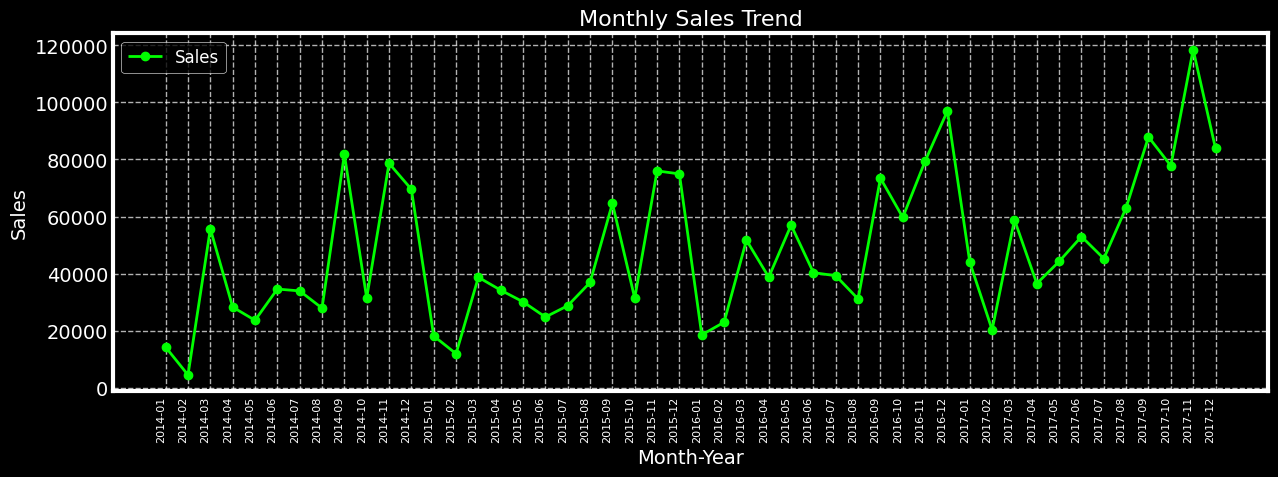

In [431]:

# Set the background to dark
plt.style.use('dark_background')

# Create the figure
plt.figure(figsize=(13, 5))

# Plot the data
plt.plot(df_temp['month_year'], df_temp['Sales'], label='Sales', color='#00FF00', marker='o', linewidth=2)  # Bright green for visibility

# Add title and labels
plt.title('Monthly Sales Trend', fontsize=16, color='white')
plt.xlabel('Month-Year', fontsize=14, color='white')
plt.ylabel('Sales', fontsize=14, color='white')

# Customize the x-axis ticks
plt.xticks(rotation='vertical', size=8, ha='right', color='white')

# Add legend
plt.legend(loc='upper left', fontsize=12, facecolor='black', edgecolor='white')

# Add grid
plt.grid(True, linestyle='--', alpha=0.7, color='white')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### So we can conclude that November is the month with highest sales.
#### 1. From the image we can observe that The Highest sales in the month of November in 2017
#### 2. The lowest sales in the month of February  in 2014

#### 2. SALES BY CATEGORY

In [432]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'month_year'],
      dtype='object')

In [433]:
sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()


In [434]:
fig = px.pie(sales_by_category,
             values='Sales',
             names='Category',
             hole=0.5,
             color_discrete_sequence=px.colors.qualitative.Pastel,
             title='Sales Analysis by Category',
             template='plotly_dark')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_font=dict(size=24, family='Arial'),
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
                  margin=dict(l=20, r=20, t=100, b=20),
                  paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)')
fig.show()

### Based on the pie chart, we can observe the following key trends: 
1. Technology accounts for the largest share, comprising 36.4% of the total.
2. Furniture is the second-largest segment, making up 32.3%.
3. Office Supplies ranks third, representing 31.3% of the total.

#### 3. SALES BY SUB CATEGORY

In [435]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'month_year'],
      dtype='object')

In [459]:
fig = px.bar(sales_by_subcategory,
             x="Sub_Category",
             y="Sales",
             hover_data=['Percentage'],
             title="Sales Analysis by Sub-Category",
             color_discrete_sequence=px.colors.qualitative.Vivid,  # Vibrant colors for dark background
             template="plotly_dark",  # Dark template
             width=1000,
             height=600)

fig.update_layout(
    xaxis_title='Sub-Category',
    yaxis_title='Total Sales',
    plot_bgcolor='rgba(0,0,0,1)',  # Black plot background
    paper_bgcolor='rgba(0,0,0,1)',  # Black paper background
    margin=dict(l=50, r=50, t=100, b=50),
    font=dict(color='white')  # White font for dark background
)

In [437]:
df.groupby('Sub_Category')['Sales'].sum().sort_values(ascending=False)

Sub_Category
Phones         330007.0540
Chairs         328449.1030
Storage        223843.6080
Tables         206965.5320
Binders        203412.7330
Machines       189238.6310
Accessories    167380.3180
Copiers        149528.0300
Bookcases      114879.9963
Appliances     107532.1610
Furnishings     91705.1640
Paper           78479.2060
Supplies        46673.5380
Art             27118.7920
Envelopes       16476.4020
Labels          12486.3120
Fasteners        3024.2800
Name: Sales, dtype: float64

### Based on the bar chart, we can observe the following key trends: 
1. Phones are the most popular product, with approximately 330,007 units sold.
2. Fasteners have the lowest sales, with around 3,024 units sold.

#### 4. MONTHLY PROFITS

In [438]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'month_year'],
      dtype='object')

In [460]:
# Group by month and sum the profit
profit_by_month = df.groupby('month_year')['Profit'].sum().reset_index()

# Create the line plot
fig = px.line(profit_by_month,
              x='month_year',
              y='Profit',
              title='Monthly Profit Analysis',
              hover_name='month_year',
              width=1200, height=600,
              template='plotly_dark')  # Use a dark theme

# Customize the line color
fig.update_traces(line=dict(color='cyan', width=2))

# Update layout for better readability on dark background
fig.update_layout(
    xaxis_title='Month-Year',
    yaxis_title='Profit',
    hovermode='x unified',
    xaxis=dict(
        tickangle=-45,
        tickfont=dict(size=10, color='white'),
        tickmode='auto',
        nticks=12
    ),
    yaxis=dict(
        tickfont=dict(size=10, color='white')
    ),
    title_font=dict(size=20, color='white'),
    paper_bgcolor='rgba(0,0,0,0)',  # Transparent background
    plot_bgcolor='rgba(0,0,0,0)',   # Transparent plot background
    font=dict(color='white')        # Set default font color to white
)

# Add range slider and selector
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label='1m', step='month', stepmode='backward'),
            dict(count=6, label='6m', step='month', stepmode='backward'),
            dict(count=1, label='YTD', step='year', stepmode='todate'),
            dict(count=1, label='1y', step='year', stepmode='backward'),
            dict(step='all')
        ]),
        bgcolor='rgba(0,0,0,0.7)',  # Semi-transparent background for the range selector
        font=dict(color='white')    # White text for the range selector
    )
)

# Show the plot
fig.show()

In [440]:
profit_by_month = df.groupby('month_year')['Profit'].sum().reset_index()
profit_by_month['month_year'] = pd.to_datetime(profit_by_month['month_year'])

min_profit = round(profit_by_month['Profit'].min())
max_profit = round(profit_by_month['Profit'].max())
avg_profit = round(profit_by_month['Profit'].mean())

min_profit_month = profit_by_month.loc[profit_by_month['Profit'].idxmin()]['month_year'].strftime('%B')
min_profit_year = profit_by_month.loc[profit_by_month['Profit'].idxmin()]['month_year'].year
max_profit_month = profit_by_month.loc[profit_by_month['Profit'].idxmax()]['month_year'].strftime('%B')
max_profit_year = profit_by_month.loc[profit_by_month['Profit'].idxmax()]['month_year'].year

print("Min Profit:", min_profit, "in", min_profit_month, "of the year", min_profit_year)
print("Max Profit:", max_profit, "in", max_profit_month, "of the year", max_profit_year)
print("Average Profit:", avg_profit)

Min Profit: -3281 in January of the year 2015
Max Profit: 17885 in December of the year 2016
Average Profit: 5967


### Based on the Graph, we can observe the following key trends: 
1. The Lowest Profit Recorded: -$3,281 in January 2015
2. The Highest Profit Recorded: $17,885 in December 2016
3. The Average Annual Profit: $5,967

#### 5. PROFIT BY CATEGORY

In [441]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'month_year'],
      dtype='object')

In [442]:
profit_by_category = df.groupby('Category')['Profit'].sum().reset_index()


In [443]:
profit_by_category = df.groupby('Category')['Profit'].sum().reset_index()

fig = px.pie(profit_by_category,
            values = 'Profit',
            names = 'Category',
            hole = 0.5,
            color_discrete_sequence=px.colors.qualitative.D3,
            title='Profit Analysis by Category',
            template='plotly_dark')

fig.update_traces(textposition = 'inside',
                 textinfo= 'percent+label',
                 textfont_size=12,
                 textfont_color='white')

fig.update_layout(title_font=dict(size=24, color='white'),
                 legend_title_text='Category',
                 legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1),
                 paper_bgcolor='black',
                 plot_bgcolor='black')

fig.show()

### Based on the pie chart, we can observe the following key trends: 
1. Technology generates the largest profit, accounting for 50.8% of the total.
2. Office Supplies ranks second, representing 42.8% of the total profit.
3. Furniture has the lowest profit, making up 6.44% of the total.

#### 6. PROFIT BY SUB-CATEGORY


In [444]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'month_year'],
      dtype='object')

In [461]:
# Group by Sub_Category and sum the profit, then sort by Profit in descending order
profit_by_subcategory = df.groupby('Sub_Category')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)

# Create the bar plot
fig = px.bar(profit_by_subcategory,
             x='Sub_Category',
             y='Profit',
             title='Profit Analysis by SubCategory',
             color='Sub_Category',  # Add color mapping for better distinction
             color_discrete_sequence=px.colors.qualitative.Vivid,  # Use a vibrant color palette
             template='plotly_dark')  # Use a dark theme

# Update layout for better readability on dark background
fig.update_layout(
    xaxis_title='Sub Category',
    yaxis_title='Total Profit',
    xaxis=dict(tickangle=-45, tickfont=dict(size=12, color='white')),
    yaxis=dict(tickfont=dict(size=12, color='white')),
    title_font=dict(size=20, color='white'),
    font=dict(size=14, color='white'),  # Set default font color to white
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent plot background
    paper_bgcolor='rgba(0,0,0,0)',  # Transparent paper background
    bargap=0.2,  # Gap between bars
    bargroupgap=0.1,  # Gap between groups of bars
    width=1200,  # Expand width
    height=700,  # Expand height
    legend=dict(font=dict(size=12, color='white'))  # Customize legend font
)

# Show the plot
fig.show()

### Based on the bar chart, we can observe the following key trends: 
1. The sub-category "Copiers" has the highest profit.
2. The sub-category "Tables" has the lowest profit.

#### 7. PROFIT ANALYSIS BY CUSTOMER SEGMENTS

In [446]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'month_year'],
      dtype='object')

In [462]:
# Group by Segment and calculate total Sales and Profit
sales_profit_by_segment = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Define a color palette suitable for dark backgrounds
color_palette = ['#66b3ff', '#ffcc00']  # Light blue and yellow for contrast

# Create the grouped bar chart
fig = go.Figure(data=[
    go.Bar(x=sales_profit_by_segment['Segment'], y=sales_profit_by_segment['Sales'], name="Sales", marker_color=color_palette[0]),
    go.Bar(x=sales_profit_by_segment['Segment'], y=sales_profit_by_segment['Profit'], name="Profit", marker_color=color_palette[1])
])

# Update layout for dark background
fig.update_layout(
    title="Sales and Profit Analysis by Customer Segment",
    xaxis_title='Customer Segment',
    yaxis_title='Amount (USD)',
    barmode='group',
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent plot background
    paper_bgcolor='rgba(0,0,0,0)',  # Transparent paper background
    font=dict(color='white', size=14),  # Set default font color to white
    title_font=dict(size=20, color='white'),  # Customize title font
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1, font=dict(size=12, color='white')),
    hovermode='x unified'  # Unified hover mode for better interactivity
)

# Customize x-axis and y-axis
fig.update_xaxes(
    tickangle=45,
    tickfont=dict(size=12, color='white'),  # White tick labels
    title_font=dict(size=14, color='white')  # White axis title
)

fig.update_yaxes(
    tickfont=dict(size=12, color='white'),  # White tick labels
    title_font=dict(size=14, color='white')  # White axis title
)

# Add hover template for better interactivity
fig.update_traces(
    hovertemplate="<b>%{x}</b><br>Amount: %{y:$,.0f}<extra></extra>"
)

# Show the plot
fig.show()

### Sales and Profit Analysis by Customer Segment Summary
1. Total Sales: $2,297,200.86
2. Total Profit: $286,397.02

#### 8. SALES TO PROFIT RATIO

In [448]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'month_year'],
      dtype='object')

In [449]:
# Calculate sales and profit by segment
# This code calculates the total sales and profit for each segment in the dataset
# and then computes the sales-to-profit ratio for each segment.

sales_profit_by_segment = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
# Apply a lambda function to calculate the sales-to-profit ratio for each segment
# If the profit is zero, the ratio is set to zero to avoid division by zero errors
sales_profit_by_segment['Sales_to_Profit_Ratio'] = sales_profit_by_segment.apply(lambda row: row['Sales'] / row['Profit'] if row['Profit'] != 0 else 0, axis=1)
# Print the segment and its corresponding sales-to-profit ratio
print(sales_profit_by_segment[['Segment', 'Sales_to_Profit_Ratio']])

       Segment  Sales_to_Profit_Ratio
0     Consumer               8.659471
1    Corporate               7.677245
2  Home Office               7.125416


#### The segment consumer has the highest sales-to-profit ratio, indicating a strong market performance.

#### 9. WHICH ARE THE TOP 10 PRODUCTS BY SALES?

In [450]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'month_year'],
      dtype='object')

In [451]:
# Grouping products by sales
prod_sales = pd.DataFrame(df.groupby('Product_Name')['Sales'].sum())

#Sorting the DataFrame in descendin order
prod_sales.sort_values(by=['Sales'], inplace = True, ascending = False)

#Top 10 Products by Sales
prod_sales[:10]

,Sales
Product_Name,
Canon imageCLASS 2200 Advanced Copier,61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480
HON 5400 Series Task Chairs for Big and Tall,21870.576
GBC DocuBind TL300 Electric Binding System,19823.479
GBC Ibimaster 500 Manual ProClick Binding System,19024.500
Hewlett Packard LaserJet 3310 Copier,18839.686
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.895
GBC DocuBind P400 Electric Binding System,17965.068


# Top 10 Products by Sales
### Product Sales Data

| Product Name | Sales |
| --- | --- |
| Canon imageCLASS 2200 Advanced Copier | 61,599.824 |
| Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind | 27,453.384 |
| Cisco TelePresence System EX90 Videoconferencing Unit | 22,638.480 |
| HON 5400 Series Task Chairs for Big and Tall | 21,870.576 |
| GBC DocuBind TL300 Electric Binding System | 19,823.479 |
| GBC Ibimaster 500 Manual ProClick Binding System | 19,024.500 |
| Hewlett Packard LaserJet 3310 Copier | 18,839.686 |
| HP Designjet T520 Inkjet Large Format Printer - 24" Color | 18,374.895 |
| GBC DocuBind P400 Electric Binding System | 17,965.068 |
| High Speed Automatic Electric Letter Opener | 17,030.312 |

#### 10. WHICH ARE THE MOST SELLING PRODUCTS?

In [452]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'month_year'],
      dtype='object')

In [453]:
# Grouping products by sales
prod_sales = pd.DataFrame(df.groupby('Product_Name')['Quantity'].sum())

#Sorting the DataFrame in descendin order
prod_sales.sort_values(by=['Quantity'], inplace = True, ascending = False)

#Top 10 Products by Sales
prod_sales[:10]

,Quantity
Product_Name,
Staples,215
Staple envelope,170
Easy-staple paper,150
Staples in misc. colors,86
KI Adjustable-Height Table,74
Avery Non-Stick Binders,71
Storex Dura Pro Binders,71
GBC Premium Transparent Covers with Diagonal Lined Pattern,67
"Situations Contoured Folding Chairs, 4/Set",64


#### Most Selling Products
| Quantity | Product Name |
|----------|--------------|
| 215      | Staples      |
| 170      | Staple Envelope|
| 150      | Easy-Staple Paper|
| 86       | Staples in Miscellaneous Colors|
| 74       | KI Adjustable-Height Table|
| 71       | Avery Non-Stick Binders|
| 71       | Storex Dura Pro Binders|
| 67       | GBC Premium Transparent Covers with Diagonal Lined Pattern|
| 64       | Situations Contoured Folding Chairs (4/Set)|
| 62       | Staple-Based Wall Hangings|

#### 11. WHAT IS THE MOST PREFERRED SHIP MODE?

In [454]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'month_year'],
      dtype='object')

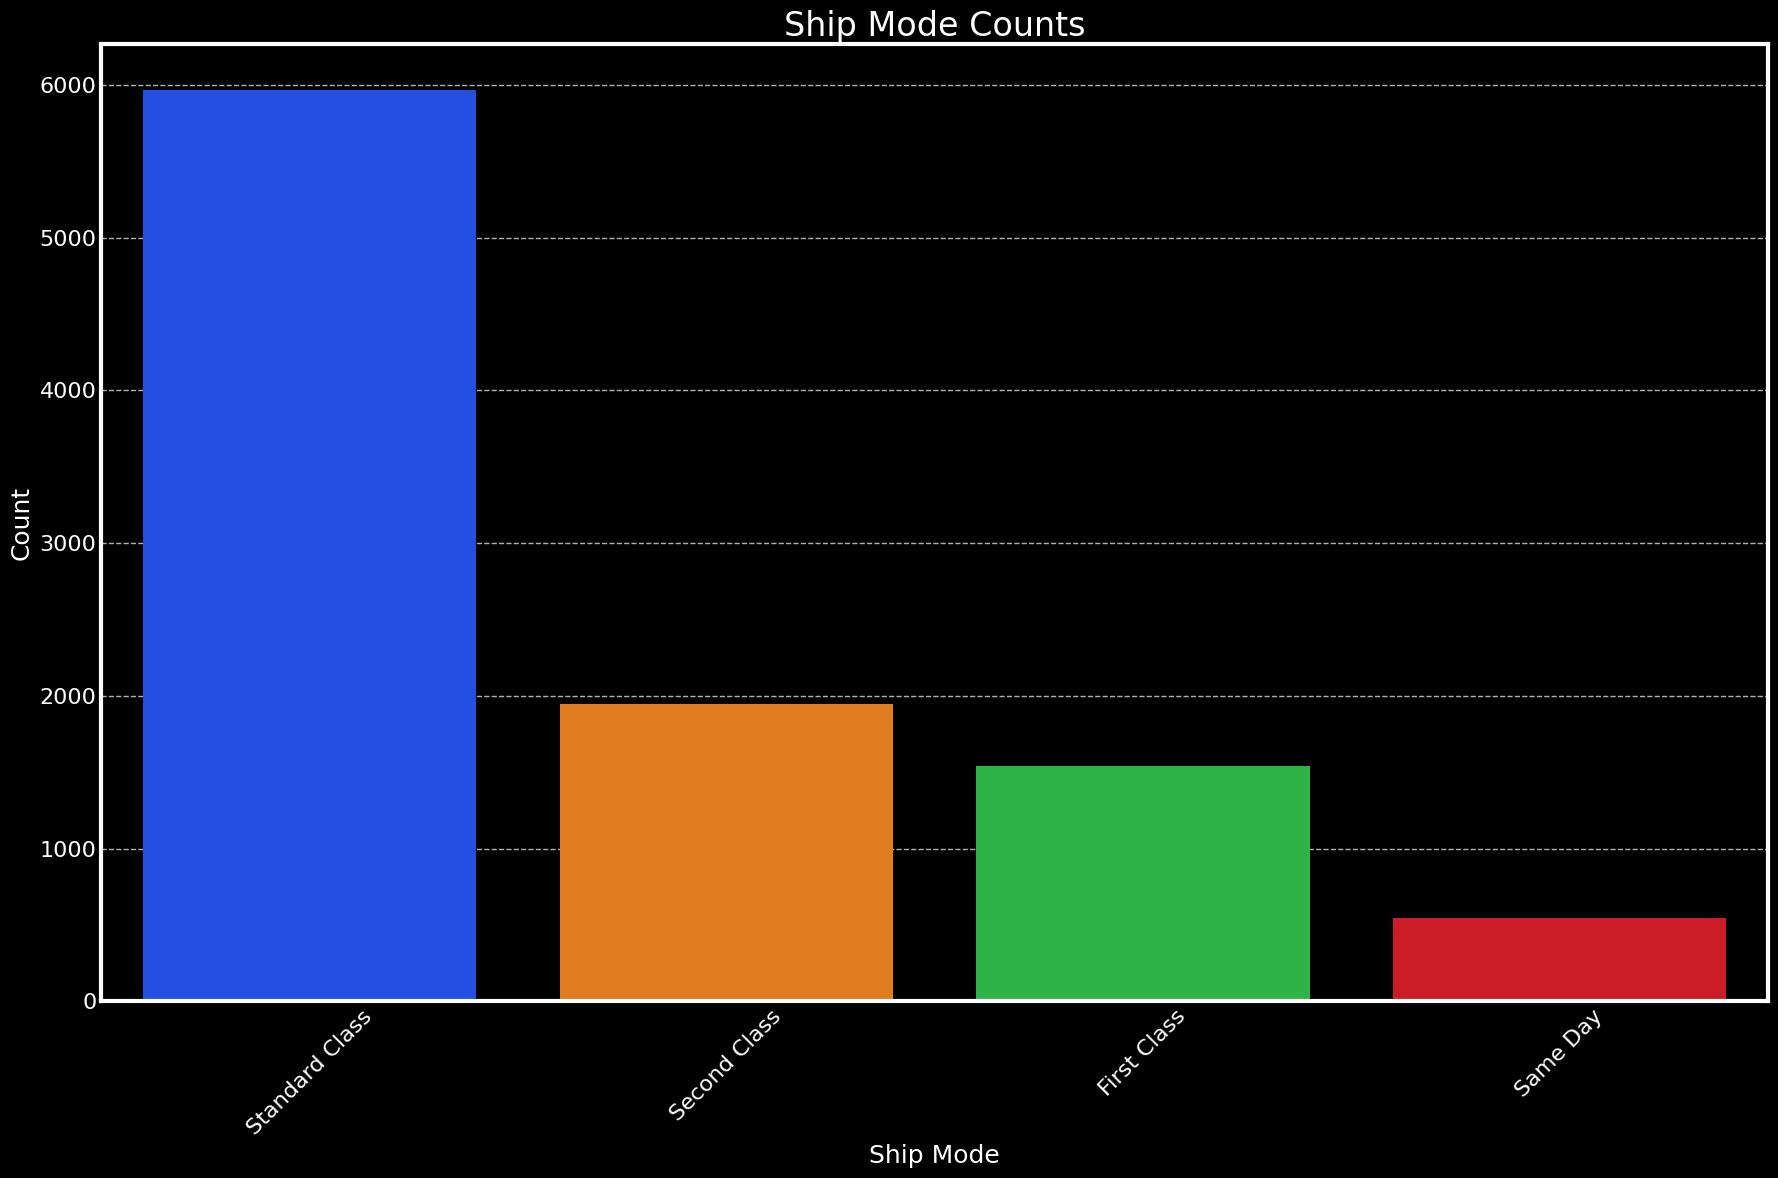

In [465]:
# Set dark background style
plt.style.use('dark_background')

# Create the count plot
plt.figure(figsize=(18, 12))  # Expanded figure size
sns.countplot(
    x='Ship_Mode', 
    data=df, 
    palette='bright',  # Use a vibrant color palette
    order=df['Ship_Mode'].value_counts().index  # Order by frequency
)

# Customize the plot
plt.title('Ship Mode Counts', fontsize=24, color='white')
plt.xlabel('Ship Mode', fontsize=18, color='white')
plt.ylabel('Count', fontsize=18, color='white')
plt.xticks(rotation=45, fontsize=16, color='white')  # Rotate x-axis labels and set font color
plt.yticks(fontsize=16, color='white')  # Set y-axis tick font color

# Add gridlines for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#### Standard class is generally the preferred shipping mode.

#### 12. WHICH ARE THE MOST PROFITABLE CATEGORY AND SUB-CATEGORY?

In [456]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'month_year'],
      dtype='object')

In [457]:
# Grouping products by Category and Sub-Category
cat_subcat = pd.DataFrame(df.groupby(['Category','Sub_Category'])['Profit'].sum())

# Sorting The values
cat_subcat.sort_values(['Category','Profit'], ascending = False)

Profit
Category        Sub_Category            
Technology      Copiers       55617.8249
                Phones        44515.7306
                Accessories   41936.6357
                Machines       3384.7569
Office Supplies Paper         34053.5693
                Binders       30221.7633
                Storage       21278.8264
                Appliances    18138.0054
                Envelopes      6964.1767
                Art            6527.7870
                Labels         5546.2540
                Fasteners       949.5182
                Supplies      -1189.0995
Furniture       Chairs        26590.1663
                Furnishings   13059.1436
                Bookcases     -3472.5560
                Tables       -17725.4811

# Profit by Category and Sub-Category
| Category | Sub-Category | Profit |
| --- | --- | --- |
| Technology | Copiers | 55,617.82 |
| Technology | Phones | 44,515.73 |
| Technology | Accessories | 41,936.64 |
| Technology | Machines | 3,384.76 |
| Office Supplies | Paper | 34,053.57 |
| Office Supplies | Binders | 30,221.76 |
| Office Supplies | Storage | 21,278.83 |
| Office Supplies | Appliances | 18,138.01 |
| Office Supplies | Envelopes | 6,964.18 |
| Office Supplies | Art | 6,527.79 |
| Office Supplies | Labels | 5,546.25 |
| Office Supplies | Fasteners | 949.52 |
| Office Supplies | Supplies | -1,189.10 |
| Furniture | Chairs | 26,590.17 |
| Furniture | Furnishings | 13,059.14 |
| Furniture | Bookcases | -3,472.56 |
| Furniture | Tables | -17,725.48 |

### Category Technology Sub_Category copies are the most profitable
